<a href="https://colab.research.google.com/github/bessx/aniclass/blob/master/COCO_dataset_downloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
dataType='val2014'
!wget -nc http://images.cocodataset.org/annotations/annotations_train"$dataType".zip
!unzip -n annotations_train"$dataType".zip

--2020-04-29 02:49:26--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.114.123
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.114.123|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  16.9MB/s    in 16s     

2020-04-29 02:49:43 (15.2 MB/s) - ‘annotations_trainval2014.zip’ saved [252872794/252872794]

Archive:  annotations_trainval2014.zip
  inflating: annotations/instances_train2014.json  
  inflating: annotations/instances_val2014.json  
  inflating: annotations/person_keypoints_train2014.json  
  inflating: annotations/person_keypoints_val2014.json  
  inflating: annotations/captions_train2014.json  
  inflating: annotations/captions_val2014.json  


In [0]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [19]:
dataDir='/content'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
print(annFile)

/content/annotations/instances_val2014.json


In [20]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=5.59s)
creating index...
index created!


In [21]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
food appliance furniture electronic animal accessory indoor person vehicle kitchen sports outdoor


In [0]:
# catIds = coco.getCatIds(catNms=['oven']);
# catIds = [16]

In [23]:
url_list = []
url_list_animals = []
url_list_teddy = []
url_list_not = []

for id, cat in enumerate(cats):
  catIds = [cat['id']]
  imgIds = coco.getImgIds(catIds=catIds);
  print(cat['id'], cat['name'], '-', len(imgIds), 'images.')
  img = coco.loadImgs(imgIds)
  
  # save urls
  if(cat['id'] > 15 and cat['id'] < 26):
    for url in img:
      url_list_animals.append(url['coco_url'])
      url_list.append(url['coco_url'])
  elif(cat['id'] == 88):
    for url in img:
      url_list_teddy.append(url['coco_url'])
      url_list.append(url['coco_url'])
  else:
    for url in img:
      url_list_not.append(url['coco_url'])
      url_list.append(url['coco_url'])
  
  print('total animal urls:', len(url_list_animals))
  print('total image urls:', len(url_list))
  print()

1 person - 21634 images.
total animal urls: 0
total image urls: 21634

2 bicycle - 1114 images.
total animal urls: 0
total image urls: 22748

3 car - 4180 images.
total animal urls: 0
total image urls: 26928

4 motorcycle - 1219 images.
total animal urls: 0
total image urls: 28147

5 airplane - 840 images.
total animal urls: 0
total image urls: 28987

6 bus - 1350 images.
total animal urls: 0
total image urls: 30337

7 train - 1281 images.
total animal urls: 0
total image urls: 31618

8 truck - 2056 images.
total animal urls: 0
total image urls: 33674

9 boat - 1048 images.
total animal urls: 0
total image urls: 34722

10 traffic light - 1437 images.
total animal urls: 0
total image urls: 36159

11 fire hydrant - 592 images.
total animal urls: 0
total image urls: 36751

13 stop sign - 589 images.
total animal urls: 0
total image urls: 37340

14 parking meter - 261 images.
total animal urls: 0
total image urls: 37601

15 bench - 1961 images.
total animal urls: 0
total image urls: 39562


In [0]:
with open('ani_'+ dataType + '.txt', 'w') as f:
    f.writelines("%s\n" % u for u in url_list_animals)

with open('ted_'+ dataType + '.txt', 'w') as f:
    f.writelines("%s\n" % u for u in url_list_teddy)

with open('not_'+ dataType + '.txt', 'w') as f:
    f.writelines("%s\n" % u for u in url_list_not)

with open('list_'+ dataType + '.txt', 'w') as f:
    f.writelines("%s\n" % u for u in url_list)

In [25]:
# remove duplicate urls
!cat ani_"$dataType".txt | sort | uniq > a_"$dataType".txt
!cat ted_"$dataType".txt | sort | uniq > t_"$dataType".txt
!cat not_"$dataType".txt | sort | uniq > n_"$dataType".txt
!cat list_"$dataType".txt | sort | uniq > l_"$dataType".txt

!echo "ani vs ani unique"
!cat ani_"$dataType".txt | wc
!cat a_"$dataType".txt | wc
!echo ""
!echo "not vs not unique"
!cat n_"$dataType".txt | wc
!cat not_"$dataType".txt | wc
!echo ""
!echo "list vs list unique"
!cat list_"$dataType".txt | wc
!cat l_"$dataType".txt | wc

ani vs ani unique
   8859    8859  602412
   8265    8265  562020

list vs list unique
 116592  116592 7928256
  40137   40137 2729316


In [0]:
# # remove animals from total url list
# !grep -vxf a_"$dataType".txt l_"$dataType".txt > no_"$dataType".txt
# # remove teddy from total url list
# !grep -vxf t_"$dataType".txt no_"$dataType".txt > not_"$dataType".txt

In [30]:
# final url counts
!echo "total: "
!wc l_"$dataType".txt
!echo "animals: "
!wc a_"$dataType".txt
!echo "teddys: "
!wc t_"$dataType".txt
!echo "no animals: "
!wc n_"$dataType".txt

total: 
  40137   40137 2729316 l_val2014.txt
animals: 
  8265   8265 562020 a_val2014.txt
teddys: 
  724   724 49232 t_val2014.txt
no animals: 
  31219   31219 2122892 not_val2014.txt


In [31]:
!wc not_val2017.txt

  3851   3851 211805 not_val2017.txt


In [0]:
# take random set of 6150 
!shuf -n 6150 n_"$dataType".txt > 6150_n_"$dataType".txt

In [0]:
# !wget -nc -P other -i no_list.txt
# !wget -nc -P other -i 5000_no_val2017.txt
# !wget -nc -P teddy -i t_val2014.txt

In [0]:
!tar -czvf 5000_val2014_other other/

88 teddy bear - 724 images.


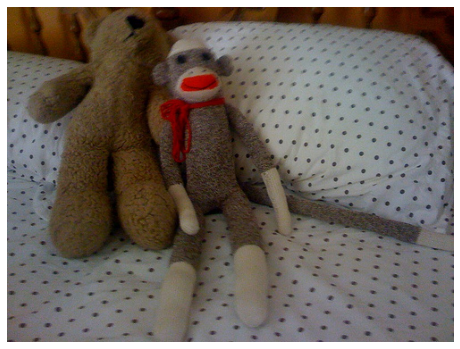

In [0]:
# Get random image from cats[id] and print cat name for sanity check
id = 77
catIds = id
imgIds = coco.getImgIds(catIds=cats[id]['id']);
print(cats[id]['id'], cats[id]['name'], '-', len(imgIds), 'images.')
img = coco.loadImgs(imgIds)

# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
imgx = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread(imgx['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [0]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [0]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

In [0]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [0]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

In [0]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()